# **Fetal Health Classification**

Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

The aim of this project is to classify the outcomes of Cardiotocogram exam (indicates the well  being of the fetus) under the three categories:
* Normal 
* Suspect
* Pathological

(The categories have been label encoded as Normal - 1, Suspect - 2, Pathological - 3) 

# Table of Contents:

1. Importing the necessary libraries and dataset
2. Analysing and visualising the dataset (EDA)
3. Model Selection and Building

  The steps covered in this section are:<br>
  3.1. Set up features and target variables <br>
  3.2. Scale the features<br>
  3.3. Split into train and test datasets<br>
  3.4. Selecting the model<br>
  3.5. Hyperparameter tuning using GridSearchCV<br>
  3.6. Evaluating the results - scores<br>

  In the second portion of section 3 we will apply mutual information and SMOTE and finally compare the models.


## 1. Importing the necessary libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/fetal_health.csv')
data.sample(5).T

,41,1575,485,1785,917
baseline value,114.000,132.000,143.000,121.000,122.000
accelerations,0.006,0.000,0.000,0.004,0.000
fetal_movement,0.047,0.000,0.001,0.002,0.000
uterine_contractions,0.009,0.003,0.000,0.002,0.005
light_decelerations,0.000,0.003,0.000,0.005,0.000
severe_decelerations,0.000,0.000,0.000,0.000,0.000
prolongued_decelerations,0.000,0.000,0.000,0.000,0.002
abnormal_short_term_variability,27.000,34.000,64.000,56.000,33.000
mean_value_of_short_term_variability,2.400,1.000,0.400,1.600,1.100
percentage_of_time_with_abnormal_long_term_variability,0.000,7.000,19.000,0.000,8.000


## 2. Analysing and visualising the data (EDA)

In [ ]:
# Shape of the dataset
data.shape 

(2126, 22)

In [ ]:
# Columns in the dataset
for i in data.columns:
  print(i)

baseline value
accelerations
fetal_movement
uterine_contractions
light_decelerations
severe_decelerations
prolongued_decelerations
abnormal_short_term_variability
mean_value_of_short_term_variability
percentage_of_time_with_abnormal_long_term_variability
mean_value_of_long_term_variability
histogram_width
histogram_min
histogram_max
histogram_number_of_peaks
histogram_number_of_zeroes
histogram_mode
histogram_mean
histogram_median
histogram_variance
histogram_tendency
fetal_health


In [ ]:
# Information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
# Checking for missing values
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64 



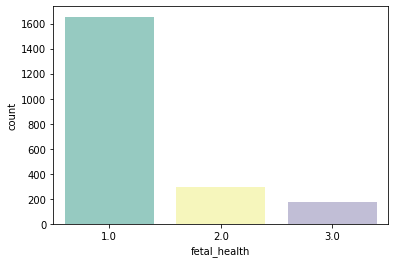

In [ ]:
# Checking the split of categories in the target class
print(data.fetal_health.value_counts(), "\n")
sns.countplot(x="fetal_health", data=data, palette="Set3");

In [ ]:
# Checking out the distribution of data for all the features
def plot_distribution(feature):
  """
  This function plots the distribution of all the features.

  Arguments: feature - columns of the dataset
  Returns: None
  """
  fig = plt.figure(figsize=(10,6))

  sns.kdeplot(data[data['fetal_health']== 1][feature])
  sns.kdeplot(data[data['fetal_health']== 2][feature])
  sns.kdeplot(data[data['fetal_health']== 3][feature])

  fig.legend(labels=['Normal', 'Suspect', 'Pathological'])
  plt.title('Fetal health based on %s'%feature)
  plt.show();

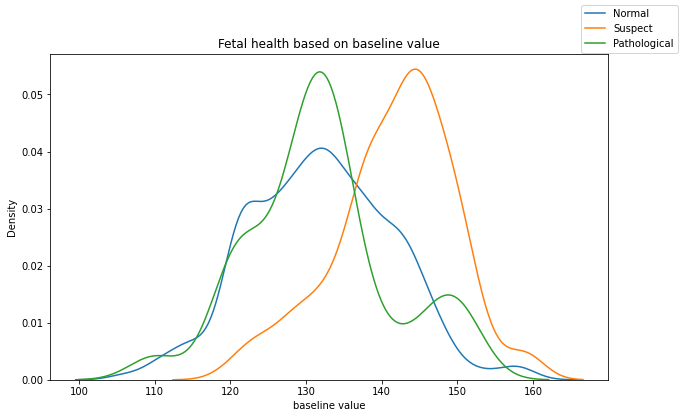

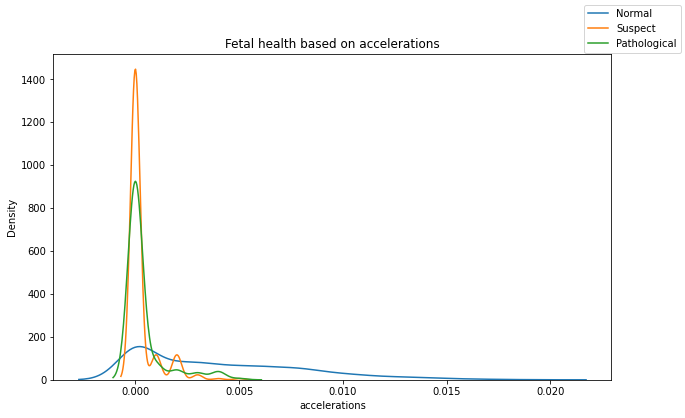

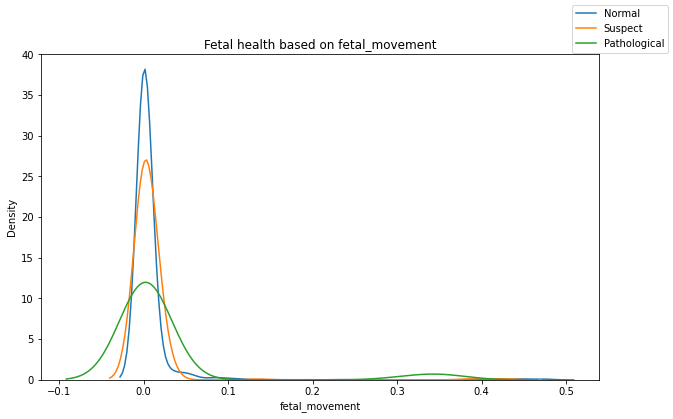

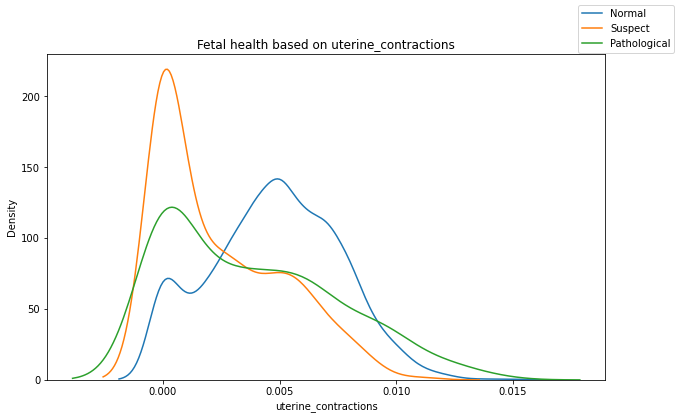

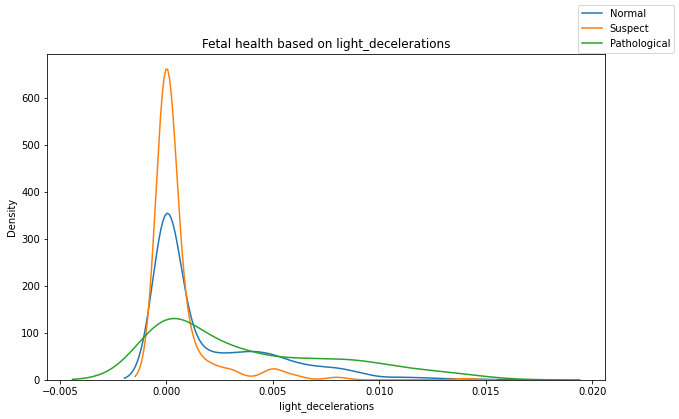

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


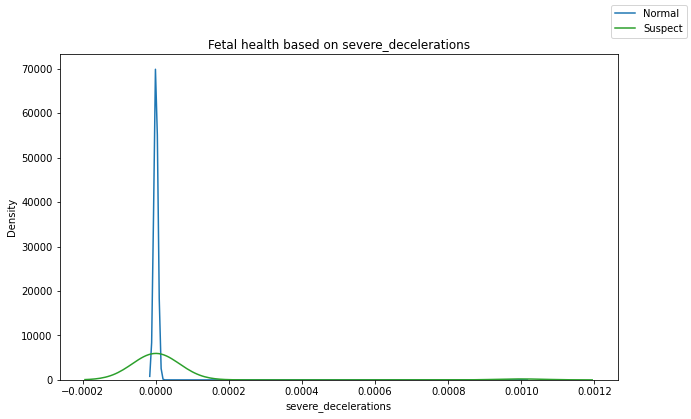

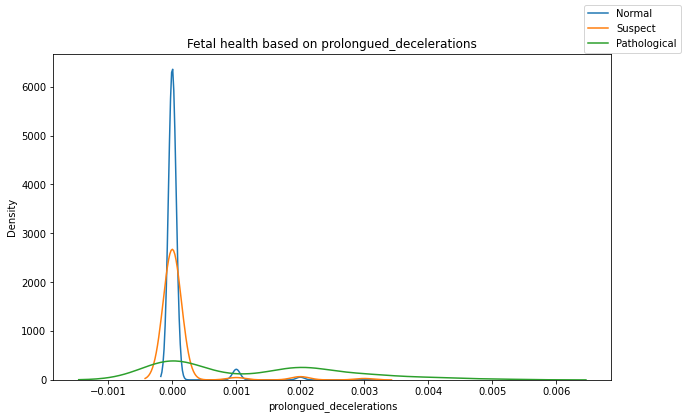

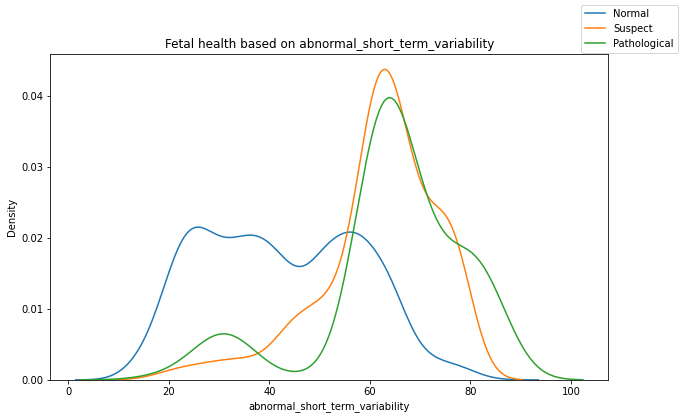

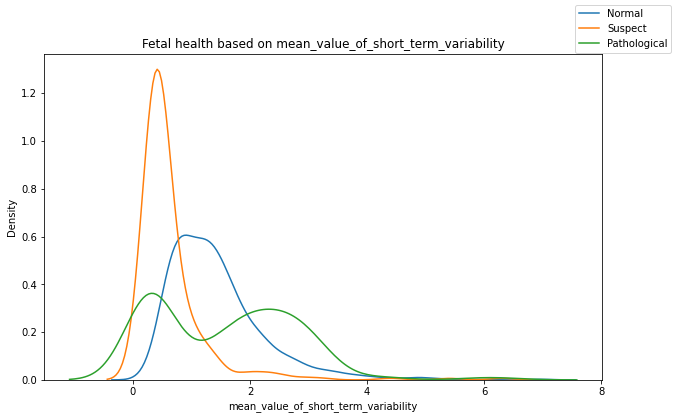

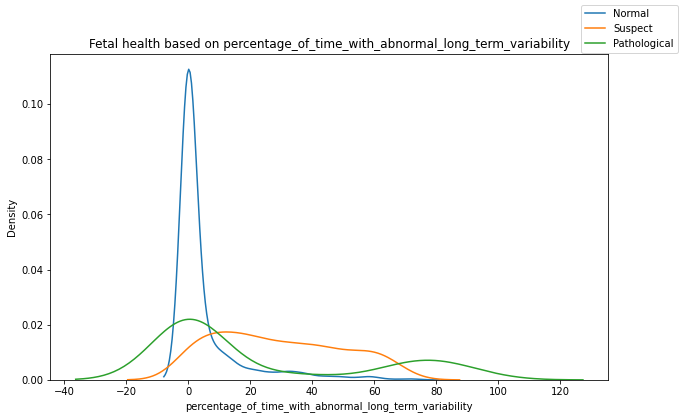

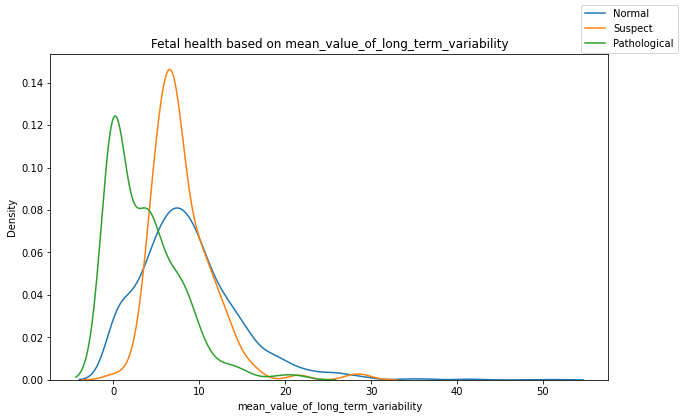

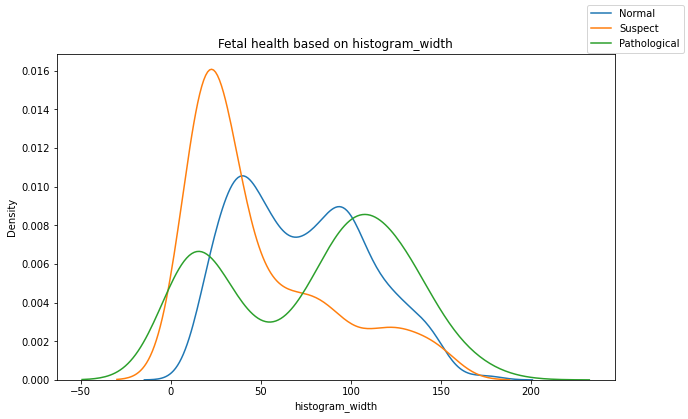

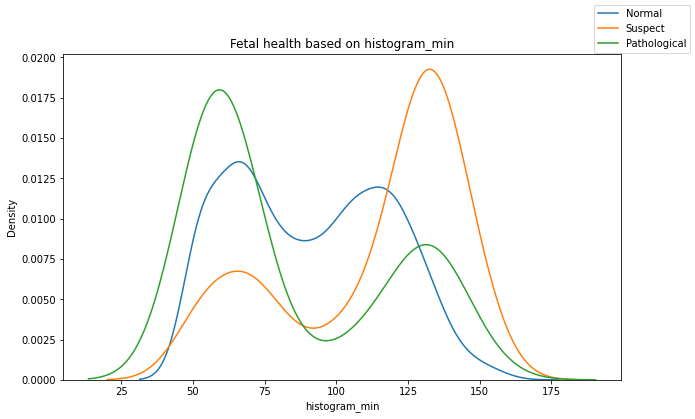

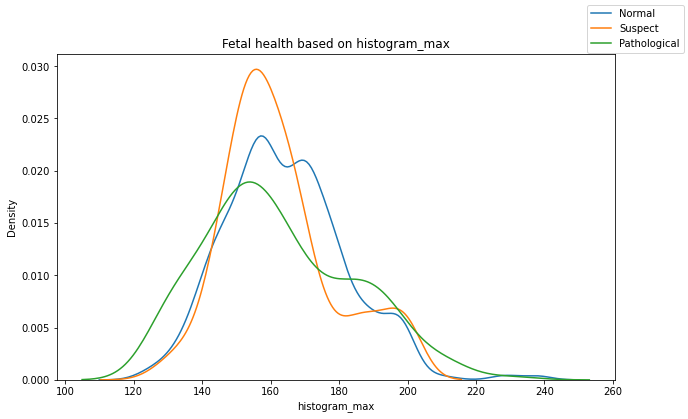

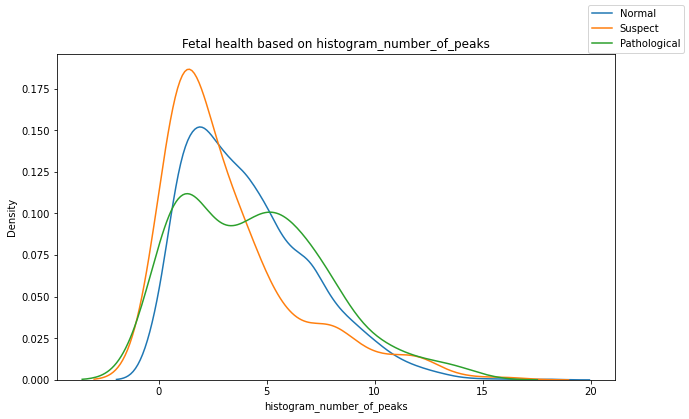

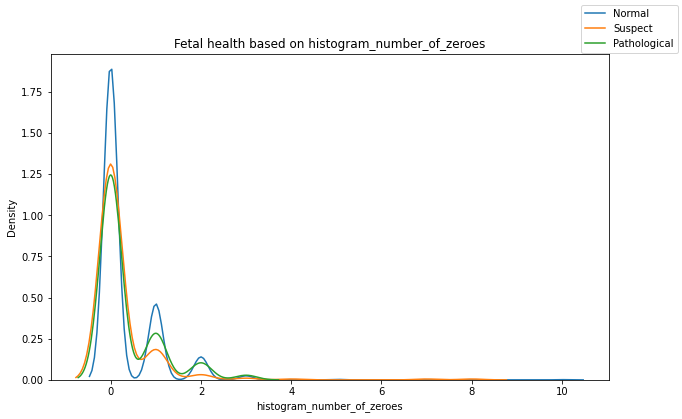

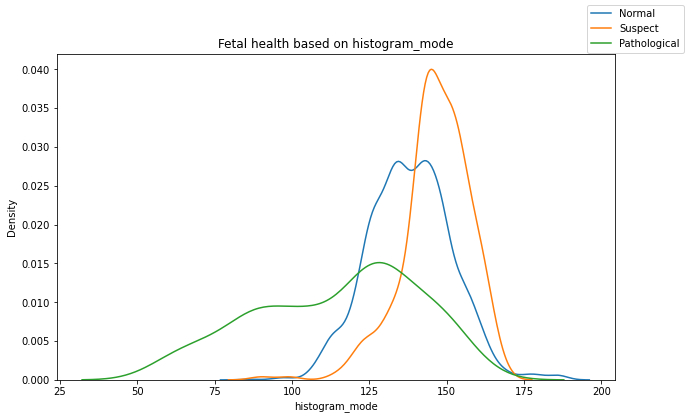

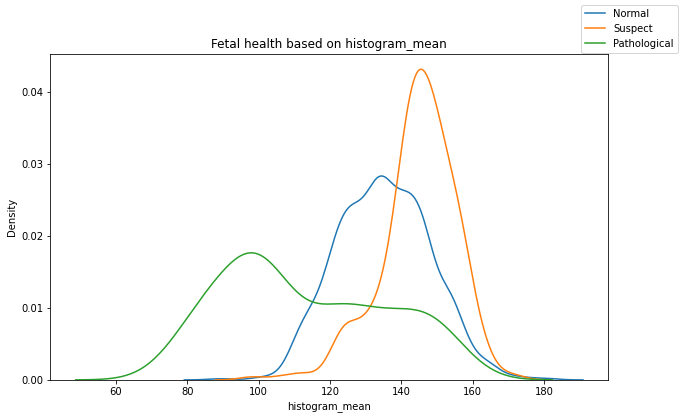

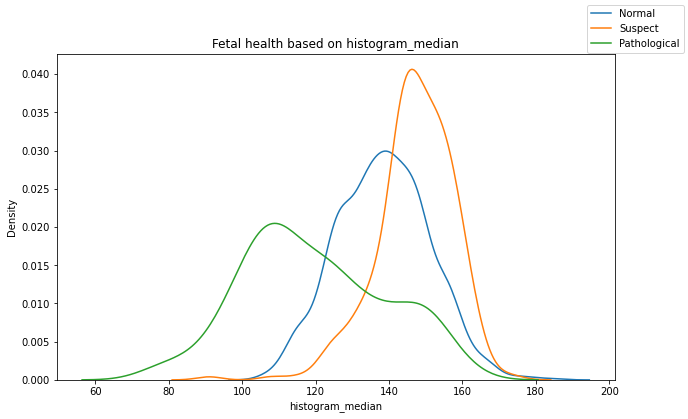

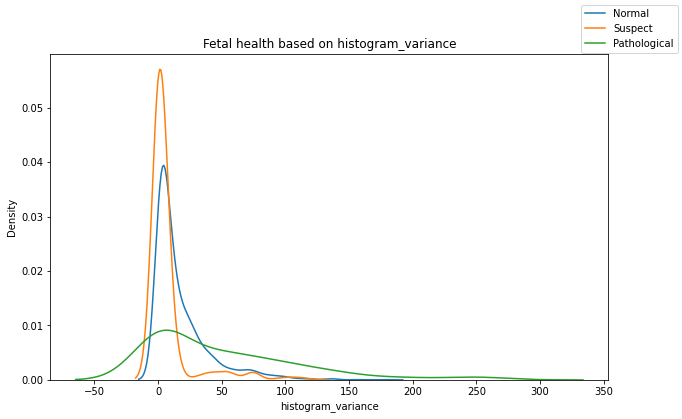

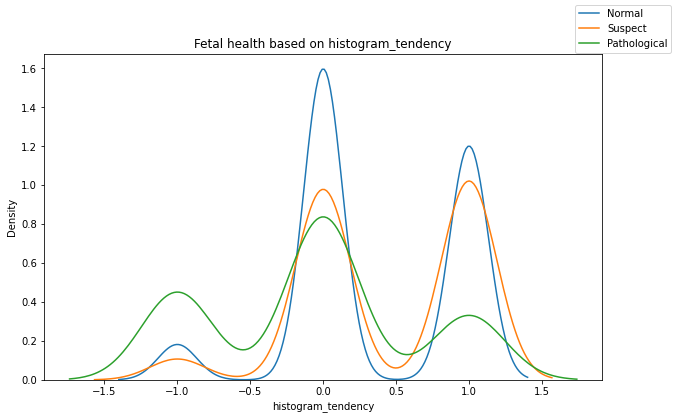

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


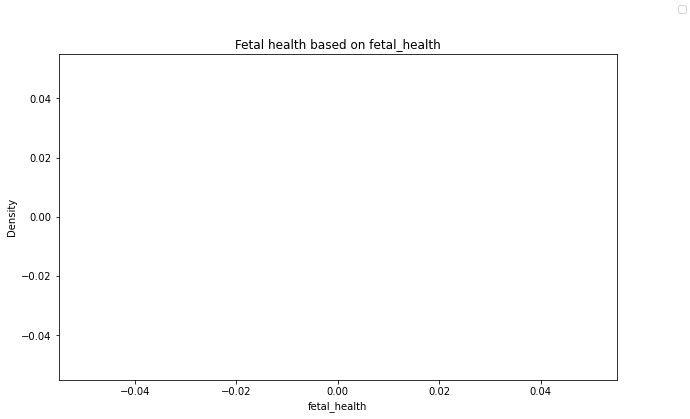

In [ ]:
for i in data.columns:
  plot_distribution(str(i))

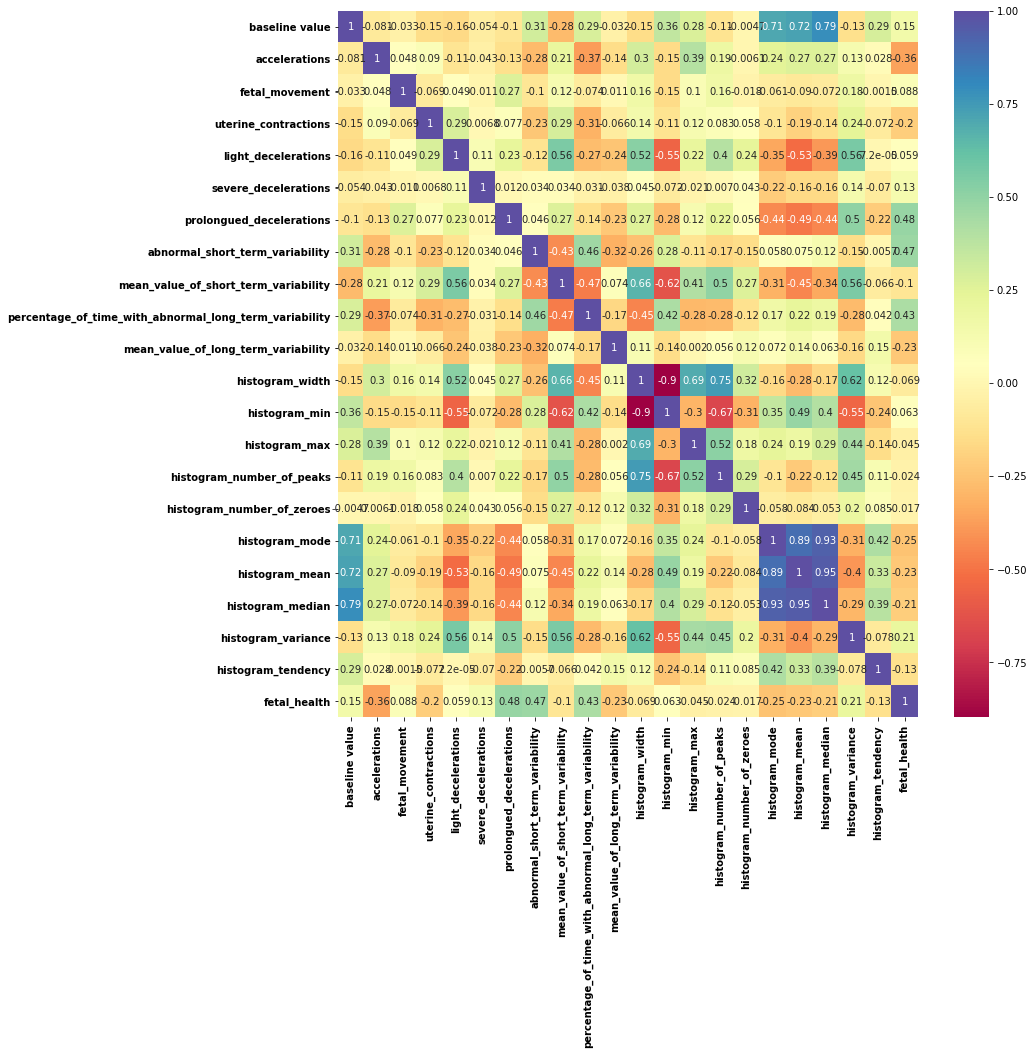

In [ ]:
# Correlation matrix
corr = data.corr()

plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True, cmap='Spectral')
plt.yticks(fontweight='bold',fontsize=10)
plt.xticks(fontweight='bold',fontsize=10)
plt.show()

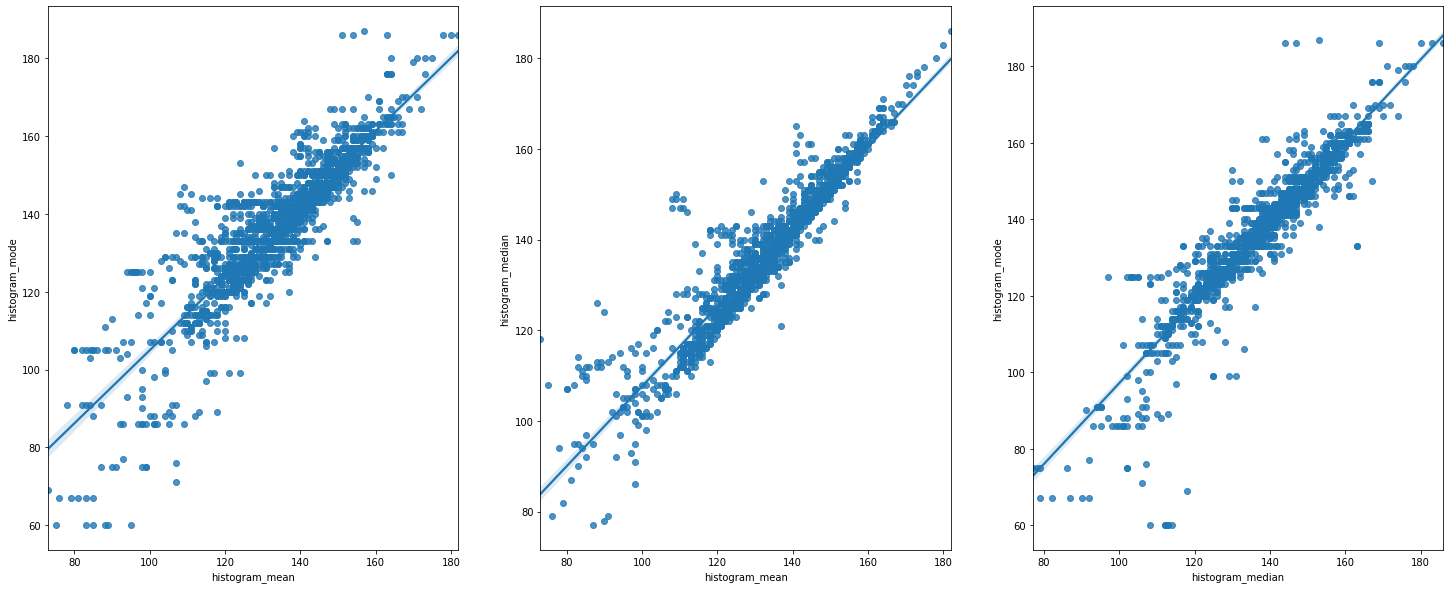

In [ ]:
# Checking the collinearity
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(25,10))
sns.regplot(data=data, x="histogram_mean", y="histogram_mode", ax=ax[0])
sns.regplot(data=data, x="histogram_mean", y="histogram_median", ax=ax[1])
sns.regplot(data=data, x="histogram_median", y="histogram_mode",ax=ax[2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


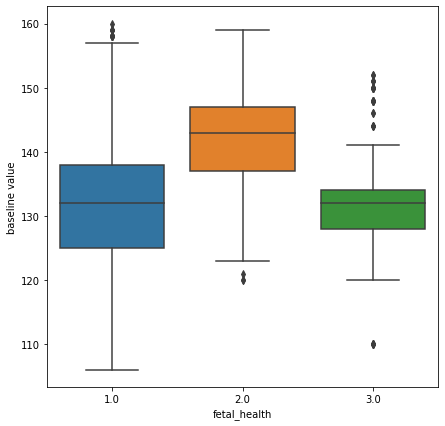

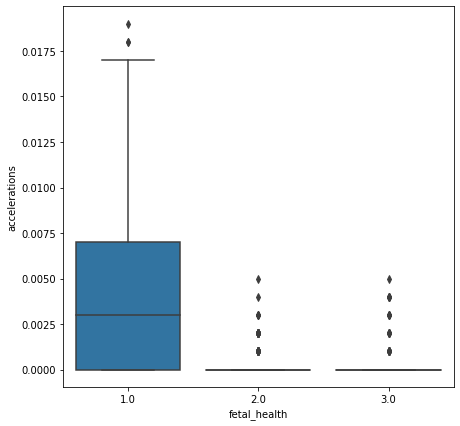

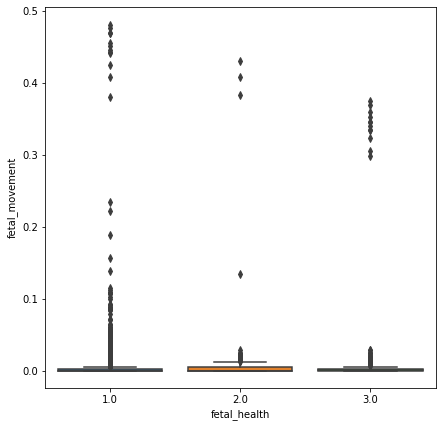

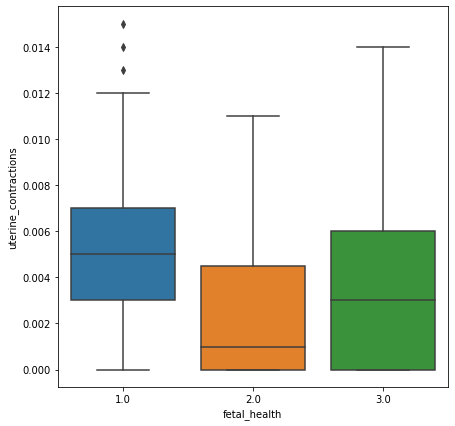

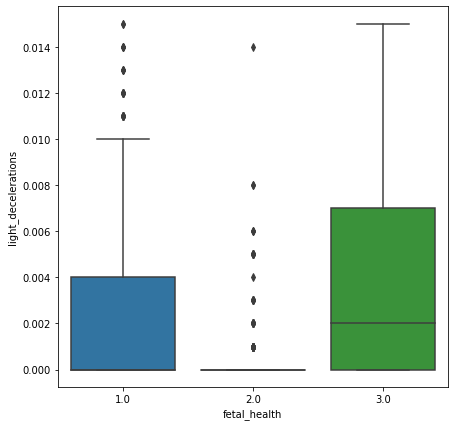

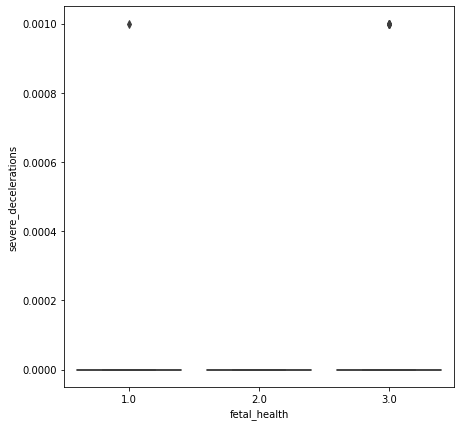

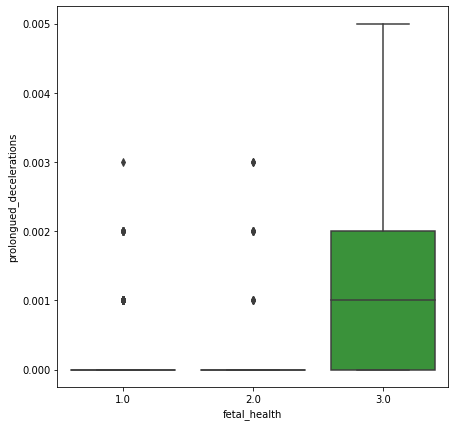

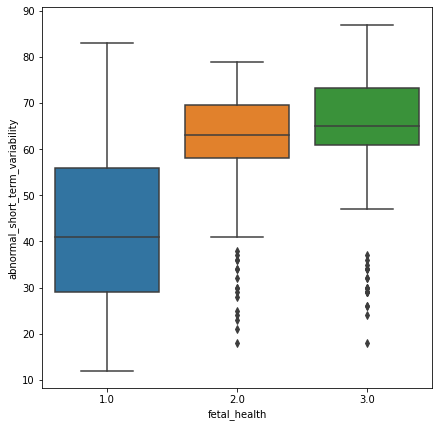

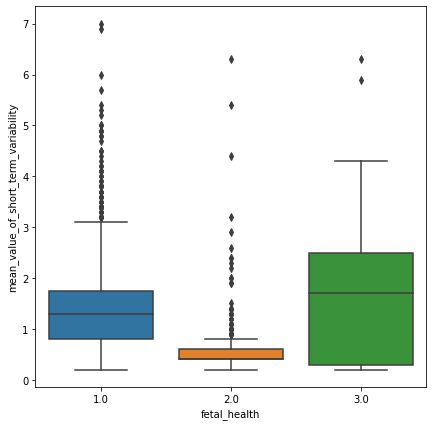

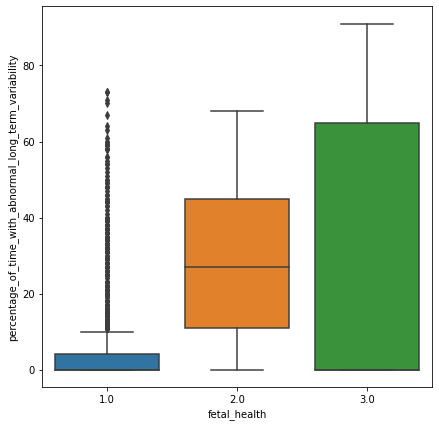

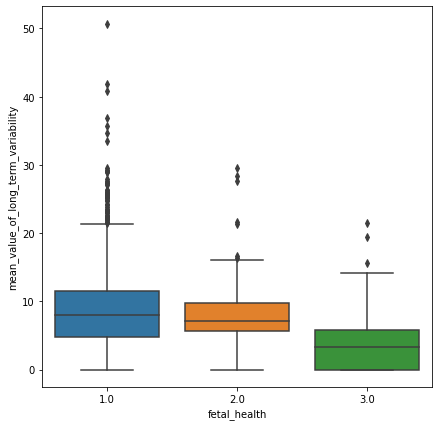

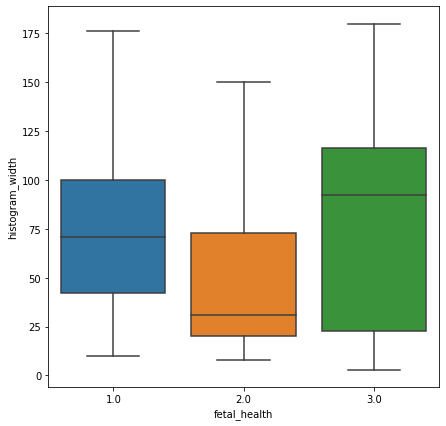

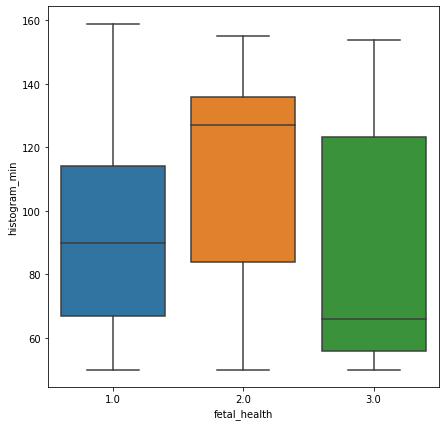

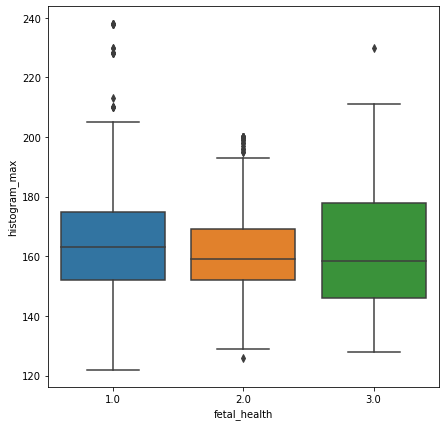

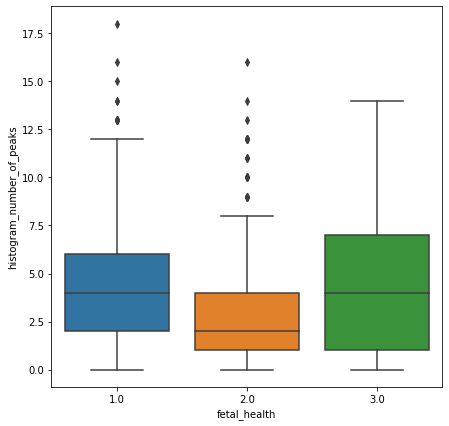

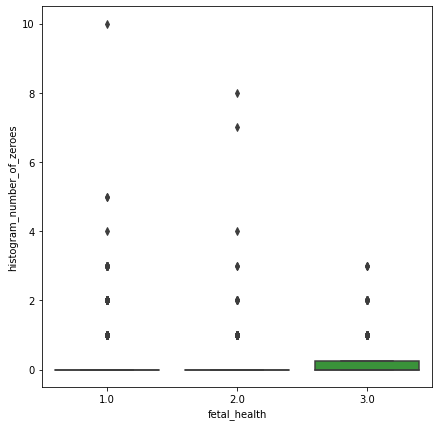

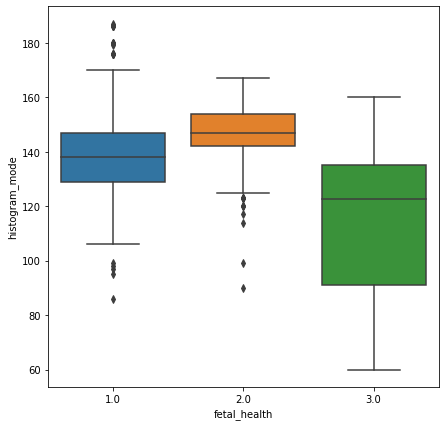

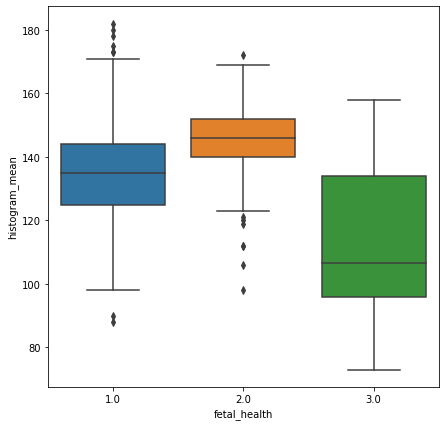

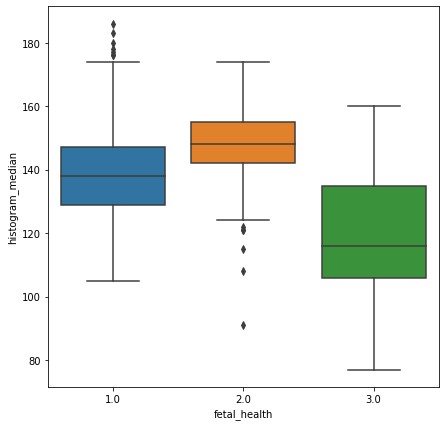

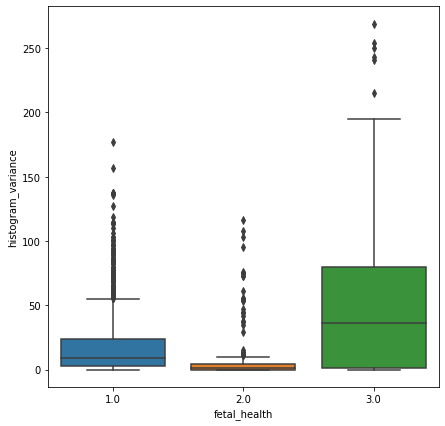

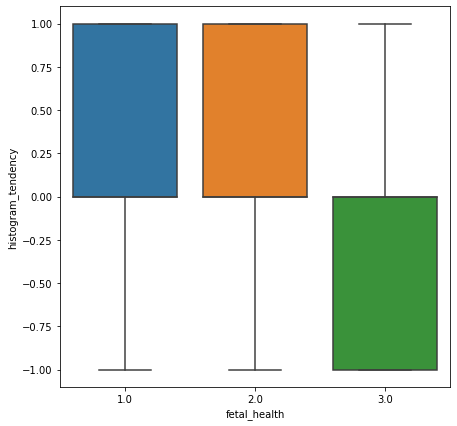

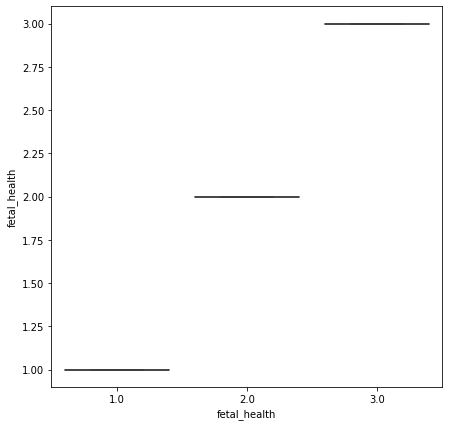

In [ ]:
# Outlier detection using boxplots
for i in data.columns:
  plt.figure(figsize=(7, 7))
  sns.boxplot(x = data['fetal_health'], y = data[str(i)])

From the above plots the following points were inferred:

1. There are no Nan/missing values.
2. There is a class imbalance among the 3 categories (i.e. normal, suspect and pathological. This suggests for *stratification* while splitting the data.
2. Features in the dataset are distributed across different scales.
3. Based on the correlation matix, it is clear that 
  * "accelerations"
  * "prolongued_decelerations"
  * "abnormal_short_term_variability"  
  * "percentage_of_time_with_abnormal_long_term_variability"  
  * "mean_value_of_long_term_variability" 
  are the features with higher correlation with fetal_health. 
4. Histogram mean , Histogram median and Histogram  mode are highly correlated features.  
4. The presence of outliers has been confirmed by the box plots drawn above. Generally outliers are removed as it's removal yields better statistics. In our case we will not be removing these outlier values from our dataset as these are outcomes of CTG reports, moreover it's unlikely that the outlier values are caused due to data entry.






## 3. Model Selection and Building


###  Modelling with all the features

In [ ]:
# Importing the required libraries

# Splitting the data
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Hyperparamter tuning
from sklearn.model_selection import GridSearchCV 

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report

In [ ]:
# Setting up features and target labels
X = data.drop(["fetal_health"], axis=1)
y = data["fetal_health"]

# Scaling the features (standard scaler)
col_names = list(X.columns)
standard_scaler = preprocessing.StandardScaler()
X_df = standard_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,4.161509e-16,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-1.535304e-16,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.958452e-15,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-2.632471e-15,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.139716e-15,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,7.254767e-16,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,4.324961e-15,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,2.687304e-16,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,-2.481552e-16,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,2.291362e-15,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


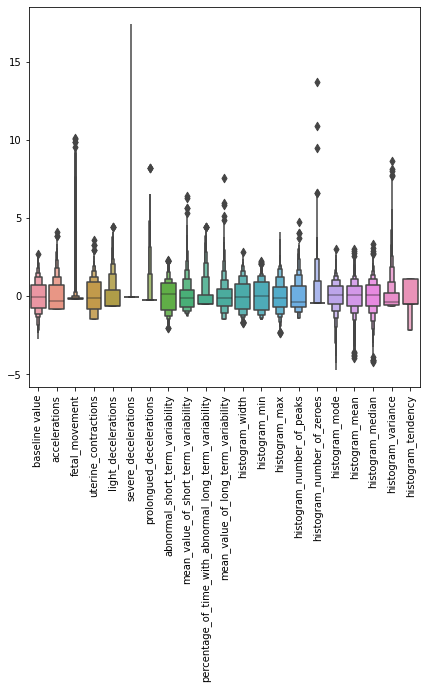

In [ ]:
# A plot to see the scaled features
plt.figure(figsize=(7, 7))
sns.boxenplot(data=X_df)
plt.xticks(rotation=90)
plt.show();

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### 1. KNN Clasiffication

In [ ]:
# Selecting the model and fitting the model to the training set
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
def evaluate_results(predictions, classifier_name):
  """
  This is a function that calculates and prints the evaluation metrics.

  Arguments: 
  predictions - predictions of the model
  classifier_name - algorithm used to classify the model

  Returns: None
  """
  accuracy = accuracy_score(y_test, predictions)
  f1_scores = f1_score(y_test, predictions, average='micro')
  precision = precision_score(y_test, predictions, average="weighted")
  recall = recall_score(y_test, predictions, average="weighted")

  print(f"    \t{classifier_name} CLASSIFIER RESULTS   ")
  print("Accuracy  :", accuracy)
  print("F1 Score  : ", f1_scores)
  print("Precision  :", precision)
  print("Recall  : ", recall)
  print(f"\n\t\tCLASSIFICATION REPORT OF {classifier_name} CLASSIFIER")
  print(" ")
  print(classification_report(y_test, predictions))
  
  # Confusion matrix
  ax= plt.subplot()
  sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax = ax, cmap = "BuPu");

  # labels, title and ticks
  ax.set_xlabel("Predicted labels")
  ax.set_ylabel("True labels")
  ax.set_title("Confusion Matrix")
  ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

    	KNN CLASSIFIER RESULTS   
Accuracy  : 0.8778195488721805
F1 Score  :  0.8778195488721805
Precision  : 0.8724569528377017
Recall  :  0.8778195488721805

		CLASSIFICATION REPORT OF KNN CLASSIFIER
 
              precision    recall  f1-score   support

         1.0       0.92      0.95      0.93       413
         2.0       0.67      0.59      0.62        82
         3.0       0.84      0.73      0.78        37

    accuracy                           0.88       532
   macro avg       0.81      0.75      0.78       532
weighted avg       0.87      0.88      0.87       532



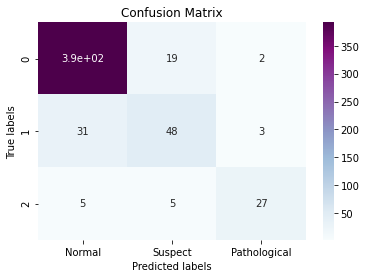

In [ ]:
preds = knn.predict(X_test)
evaluate_results(preds, "KNN")

In [ ]:
# Hyper-parameter optimisation using GridSearchCV
grid_params_knn = {
    'n_neighbors': [3,  5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs_knn = GridSearchCV(
    KNeighborsClassifier(),
    grid_params_knn,
    verbose=1, 
    cv=3, # Does stratifiedKFold cross validation
    n_jobs=-1
)

gs_result = gs_knn.fit(X_train, y_train)
print("\n", gs_result.best_score_, "\n")
print(gs_result.best_estimator_, "\n")
print(gs_result.best_params_, "\n")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



 0.8971192104555173 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance') 

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} 



[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.5s finished


    	KNN (Hyper-tuned) CLASSIFIER RESULTS   
Accuracy  : 0.900375939849624
F1 Score  :  0.900375939849624
Precision  : 0.8978570329332102
Recall  :  0.900375939849624

		CLASSIFICATION REPORT OF KNN (Hyper-tuned) CLASSIFIER
 
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       413
         2.0       0.74      0.68      0.71        82
         3.0       0.81      0.78      0.79        37

    accuracy                           0.90       532
   macro avg       0.83      0.81      0.82       532
weighted avg       0.90      0.90      0.90       532



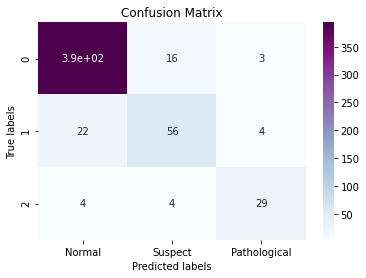

In [ ]:
# Repeating the above steps with the parameters obtained after hyper-tuning
knn_model = KNeighborsClassifier(**gs_result.best_params_)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
evaluate_results(knn_predictions, "KNN (Hyper-tuned)")

#### 2. Decision Trees

In [ ]:
# Creating and fitting the model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

    	DECISION TREE CLASSIFIER RESULTS   
Accuracy  : 0.9360902255639098
F1 Score  :  0.9360902255639098
Precision  : 0.9381438249307013
Recall  :  0.9360902255639098

		CLASSIFICATION REPORT OF DECISION TREE CLASSIFIER
 
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       413
         2.0       0.81      0.85      0.83        82
         3.0       0.85      0.95      0.90        37

    accuracy                           0.94       532
   macro avg       0.88      0.92      0.90       532
weighted avg       0.94      0.94      0.94       532



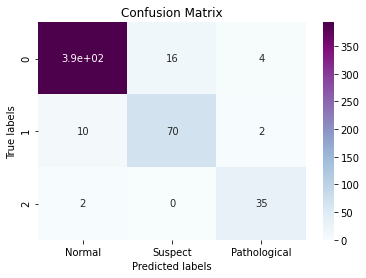

In [ ]:
# Predicting and evaluating the predictions
preds_dt = dt_clf.predict(X_test)
evaluate_results(preds_dt, "DECISION TREE")

In [ ]:
# Hyper-parameter optimisation using GridSearchCV
grid_params_dt = {'max_leaf_nodes': list(range(2, 100)), 
                  'min_samples_split': [2, 3, 4]}

gs_dt = GridSearchCV(DecisionTreeClassifier(), 
                     grid_params_dt , 
                     verbose=1, 
                     cv=3)

gs_result_dt = gs_dt.fit(X_train, y_train)
print("\n", gs_result_dt.best_score_, "\n")
print(gs_result_dt.best_estimator_, "\n")
print(gs_result_dt.best_params_, "\n")

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



 0.9178301214429672 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=42,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

{'max_leaf_nodes': 42, 'min_samples_split': 3} 



[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    8.9s finished


    	DECISION TREE (Hyper-tuned) CLASSIFIER RESULTS   
Accuracy  : 0.9398496240601504
F1 Score  :  0.9398496240601504
Precision  : 0.939929585716975
Recall  :  0.9398496240601504

		CLASSIFICATION REPORT OF DECISION TREE (Hyper-tuned) CLASSIFIER
 
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       413
         2.0       0.83      0.83      0.83        82
         3.0       0.92      0.95      0.93        37

    accuracy                           0.94       532
   macro avg       0.90      0.91      0.91       532
weighted avg       0.94      0.94      0.94       532



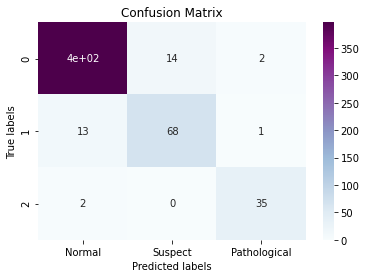

In [ ]:
# Repeating the above steps with the parameters obtained after hyper-tuning
dt_model = DecisionTreeClassifier(**gs_result_dt.best_params_)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
evaluate_results(dt_predictions, "DECISION TREE (Hyper-tuned)") 

#### 3. Random Forest Classifier

In [ ]:
# Creating and fitting the model
rf_clf = RandomForestClassifier(n_estimators=158,
                                max_depth=27,
                                class_weight='balanced')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=27, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=158,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

    	RANDOM FOREST CLASSIFIER RESULTS   
Accuracy  : 0.943609022556391
F1 Score  :  0.943609022556391
Precision  : 0.9421037078511882
Recall  :  0.943609022556391

		CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER
 
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       413
         2.0       0.88      0.77      0.82        82
         3.0       0.95      0.95      0.95        37

    accuracy                           0.94       532
   macro avg       0.93      0.90      0.91       532
weighted avg       0.94      0.94      0.94       532



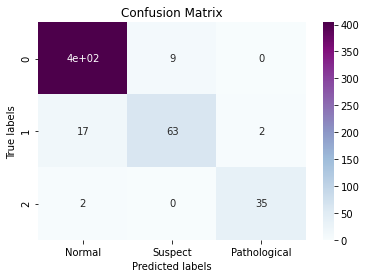

In [ ]:
# Predicting and evaluating the predictions
preds_rf = rf_clf.predict(X_test)
evaluate_results(preds_rf, "RANDOM FOREST")

In [ ]:
# Hyper-parameter optimisation using GridSearchCV
grid_params_rf = { 'n_estimators': [100,150, 200],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [4,6,8,12,14,16],
                  'criterion' :['gini', 'entropy'],
                  'n_jobs':[-1]
                  }

#Fitting the trainingset to find parameters with best accuracy
gs_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                     param_grid=grid_params_rf, 
                     cv= 3)
                            
gs_result_rt = gs_rf.fit(X_train, y_train)

gs_result_rf = gs_rf.fit(X_train, y_train)
print("\n", gs_result_rf.best_score_, "\n")
print(gs_result_rf.best_estimator_, "\n")
print(gs_result_rf.best_params_, "\n")


 0.9353834208874353 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False) 

{'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 150, 'n_jobs': -1} 



    	RANDOM FOREST (Hyper-tuned) CLASSIFIER RESULTS   
Accuracy  : 0.9530075187969925
F1 Score  :  0.9530075187969925
Precision  : 0.9522402914244954
Recall  :  0.9530075187969925

		CLASSIFICATION REPORT OF RANDOM FOREST (Hyper-tuned) CLASSIFIER
 
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       413
         2.0       0.92      0.80      0.86        82
         3.0       0.89      0.92      0.91        37

    accuracy                           0.95       532
   macro avg       0.93      0.90      0.91       532
weighted avg       0.95      0.95      0.95       532



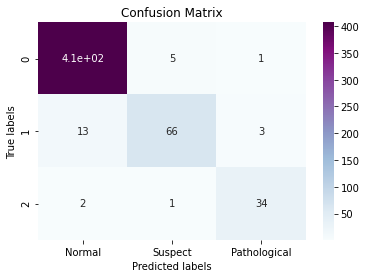

In [ ]:
# Repeating the above steps with the parameters obtained after hyper-tuning
rf_model = RandomForestClassifier(**gs_result_rf.best_params_)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
evaluate_results(rf_predictions, "RANDOM FOREST (Hyper-tuned)")

### Comparing the three models (after hyper-tuning)

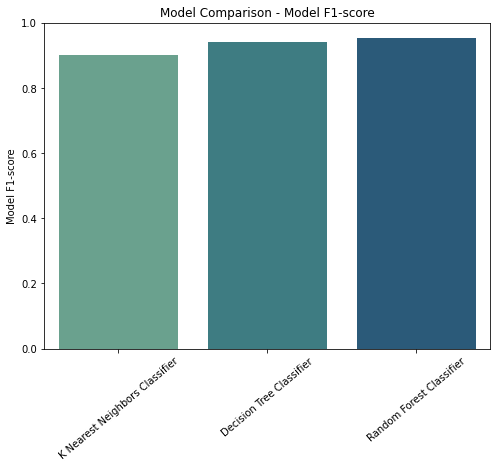

In [ ]:
x = ["K Nearest Neighbors Classifier",
     "Decision Tree Classifier",
     "Random Forest Classifier"]

KNeighborsClassifierScore = f1_score(y_test, knn_predictions, average='micro')
DecisionTreeClassifierScore = f1_score(y_test, dt_predictions, average='micro')
RandomForestClassifierScore = f1_score(y_test, rf_predictions, average='micro')

y = [KNeighborsClassifierScore,
     DecisionTreeClassifierScore,
     RandomForestClassifierScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model F1-score")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model F1-score");

From the above comparisons under each model we can see the random forest is the best classifier (by a slightly higher degree).

Now let's try improve these results further.




**Mututal Information** - Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships. 




**SMOTE** -  Synthetic Minority Oversampling Technique, is used for imbalanced classification problem. Having imbalanced classes can cause the ML techniques to have poor results on the minority class. In order to tackle this is we can oversample the minority class. This data augmnetation for the minority class is what is called SMOTE

### Mutual Information

In [ ]:
#Importing mutual information library 
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

In [ ]:
X = data.copy()
Y = X.pop("fetal_health")

# Evaluating Mutual information score for each feature    
def make_mi_scores(X, Y):
    mi_scores = mutual_info_classif(X, Y)
    mi_scores = pd.Series(mi_scores ,name="MI_scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return(mi_scores)

mi_scores=make_mi_scores(X, Y)
mi_scores

mean_value_of_short_term_variability                      0.200535
abnormal_short_term_variability                           0.188463
percentage_of_time_with_abnormal_long_term_variability    0.188230
histogram_mean                                            0.161821
histogram_mode                                            0.156848
histogram_median                                          0.156411
histogram_variance                                        0.155116
accelerations                                             0.137251
histogram_min                                             0.136475
histogram_width                                           0.129976
baseline value                                            0.124362
prolongued_decelerations                                  0.086144
mean_value_of_long_term_variability                       0.084367
histogram_max                                             0.062212
uterine_contractions                                      0.05

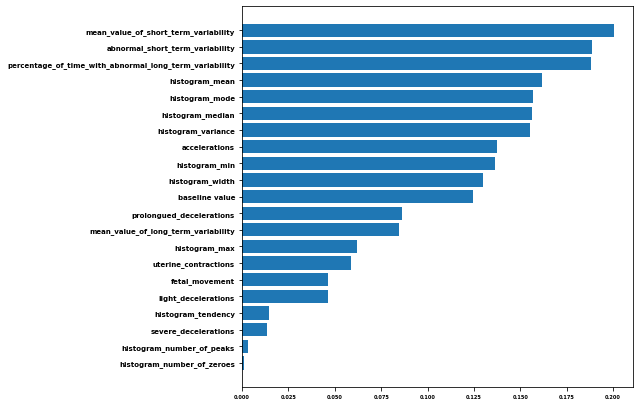

In [ ]:
# Plotting the MI scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = scores.index
    plt.barh(width,scores)
    plt.yticks(width,ticks,fontweight='bold',fontsize=7)
    plt.xticks(fontweight='bold',fontsize=5)
plt.figure(figsize=(7, 7))
plot_mi_scores(mi_scores)

In [ ]:
mi_scores1 = pd.DataFrame(mi_scores)
mi_scores2 = pd.DataFrame({'Features':mi_scores1.index,'MI':mi_scores1.MI_scores})
mi_scores2.reset_index(drop=True,inplace=True)
mi_scores2 = mi_scores2[mi_scores2["MI"]>0.0100]
#mi_scores2

# Creating a new data frame
df_new=pd.DataFrame()

for i in mi_scores2.Features:
    df_new[i] = data[i]
    
df_new

,mean_value_of_short_term_variability,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_mode,histogram_median,histogram_variance,accelerations,histogram_min,histogram_width,baseline value,prolongued_decelerations,mean_value_of_long_term_variability,histogram_max,uterine_contractions,fetal_movement,light_decelerations,histogram_tendency,severe_decelerations
0,0.5,73.0,43.0,137.0,120.0,121.0,73.0,0.000,62.0,64.0,120.0,0.0,2.4,126.0,0.000,0.000,0.000,1.0,0.0
1,2.1,17.0,0.0,136.0,141.0,140.0,12.0,0.006,68.0,130.0,132.0,0.0,10.4,198.0,0.006,0.000,0.003,0.0,0.0
2,2.1,16.0,0.0,135.0,141.0,138.0,13.0,0.003,68.0,130.0,133.0,0.0,13.4,198.0,0.008,0.000,0.003,0.0,0.0
3,2.4,16.0,0.0,134.0,137.0,137.0,13.0,0.003,53.0,117.0,134.0,0.0,23.0,170.0,0.008,0.000,0.003,1.0,0.0
4,2.4,16.0,0.0,136.0,137.0,138.0,11.0,0.007,53.0,117.0,132.0,0.0,19.9,170.0,0.008,0.000,0.000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.2,79.0,25.0,150.0,153.0,152.0,2.0,0.000,137.0,40.0,140.0,0.0,7.2,177.0,0.007,0.000,0.000,0.0,0.0
2122,0.4,78.0,22.0,148.0,152.0,151.0,3.0,0.001,103.0,66.0,140.0,0.0,7.1,169.0,0.007,0.000,0.000,1.0,0.0
2123,0.4,79.0,20.0,148.0,153.0,152.0,4.0,0.001,103.0,67.0,140.0,0.0,6.1,170.0,0.007,0.000,0.000,1.0,0.0
2124,0.4,78.0,27.0,147.0,152.0,151.0,4.0,0.001,103.0,66.0,140.0,0.0,7.0,169.0,0.006,0.000,0.000,1.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_new, Y, test_size=0.25, random_state=42)

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_samp, y_train_samp = sm.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

#### KNN Classifier (SMOTE)

    	KNN (SMOTE) CLASSIFIER RESULTS   
Accuracy  : 0.8477443609022557
F1 Score  :  0.8477443609022557
Precision  : 0.8773635379941205
Recall  :  0.8477443609022557

		CLASSIFICATION REPORT OF KNN (SMOTE) CLASSIFIER
 
              precision    recall  f1-score   support

         1.0       0.96      0.86      0.91       413
         2.0       0.55      0.77      0.64        82
         3.0       0.69      0.84      0.76        37

    accuracy                           0.85       532
   macro avg       0.73      0.82      0.77       532
weighted avg       0.88      0.85      0.86       532



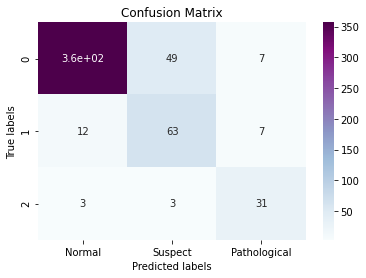

In [ ]:
# Selecting the model and fitting the model to the training set
knn_smote = KNeighborsClassifier()
knn_smote.fit(x_train_samp, y_train_samp)


# Predicting and evaluating the predictions
preds_knn_smote = knn_smote.predict(x_test)
evaluate_results(preds_knn_smote, "KNN (SMOTE)")

Clearly KNN classifier which was hyper-tuned produced better results (F1 Score  :  0.900375939849624).

#### Decision Tree Classifier (SMOTE)

    	DECISION TREE CLASSIFIER RESULTS   
Accuracy  : 0.9135338345864662
F1 Score  :  0.9135338345864662
Precision  : 0.9149085068934346
Recall  :  0.9135338345864662

		CLASSIFICATION REPORT OF DECISION TREE CLASSIFIER
 
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       413
         2.0       0.77      0.74      0.76        82
         3.0       0.77      0.92      0.84        37

    accuracy                           0.91       532
   macro avg       0.83      0.87      0.85       532
weighted avg       0.91      0.91      0.91       532



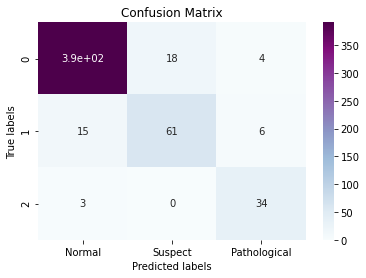

In [ ]:
# Creating and fitting the model
dt_clf_smote = DecisionTreeClassifier()
dt_clf_smote.fit(x_train_samp, y_train_samp)

# Predicting and evaluating the predictions
preds_dt_smote = dt_clf.predict(x_test)
evaluate_results(preds_dt_smote, "DECISION TREE (SMOTE)")

Decision tree classifier which was hyper-tuned produced better results (F1 Score  :  0.9398496240601504).

#### Random Forest Classifier (SMOTE)

    	RANDOM FOREST (SMOTE) CLASSIFIER RESULTS   
Accuracy  : 0.9473684210526315
F1 Score  :  0.9473684210526315
Precision  : 0.9480072669750509
Recall  :  0.9473684210526315

		CLASSIFICATION REPORT OF RANDOM FOREST (SMOTE) CLASSIFIER
 
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       413
         2.0       0.84      0.85      0.85        82
         3.0       0.87      0.92      0.89        37

    accuracy                           0.95       532
   macro avg       0.90      0.91      0.91       532
weighted avg       0.95      0.95      0.95       532



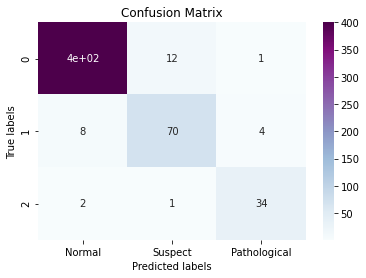

In [ ]:
# Creating and fitting the model
rf_clf_smote = RandomForestClassifier(n_estimators=135,
                                      max_depth=25,
                                      class_weight='balanced')
rf_clf_smote.fit(x_train_samp, y_train_samp)

# Predicting and evaluating the predictions
preds_rf_smote = rf_clf_smote.predict(x_test)
evaluate_results(preds_rf_smote, "RANDOM FOREST (SMOTE)")

Hyper-tuned random forests produced better results(F1 Score  :  0.9530075187969925).

### Comparing the three models (after Mutual Information and SMOTE)

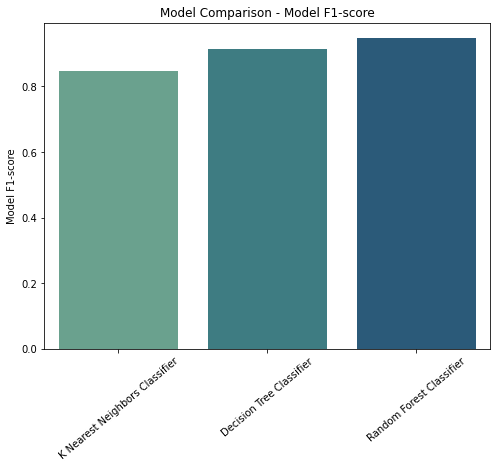

In [ ]:
x = ["K Nearest Neighbors Classifier",
     "Decision Tree Classifier",
     "Random Forest Classifier"]

KNeighborsClassifierScore = f1_score(y_test, preds_knn_smote, average='micro')
DecisionTreeClassifierScore = f1_score(y_test, preds_dt_smote, average='micro')
RandomForestClassifierScore = f1_score(y_test, preds_rf_smote, average='micro')

y = [KNeighborsClassifierScore,
     DecisionTreeClassifierScore,
     RandomForestClassifierScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model F1-score")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model F1-score");


* After removing some features (mutual information section) we did not see any improvement in the f1_score. However we were able to get good scores with less features indicating that the removed features were not having any relationship to the target.

* Despite applying few different techniques the overall metrics from the 3 different classifiers used were nearly the same, suggesting that the dataset is of good quality.

* From the above results we can conclude that the models that were hypertuned by GridSearchCV gave slightly better results than models that used SMOTE. Among the three classifiers considered **Random Forests (hyper-tuned)** seems to be the best model (highest f1_scores -  0.9530075187969925 ).


---

